## Visualización de la elevación

**PROYECTO:** SISTEMA PARA EL SEGUIMIENTO DE ECOSISTEMAS VENEZOLANOS \
**AUTOR:** Javier Martinez

In [1]:
import os

import rioxarray 
from rioxarray.merge import merge_datasets
import xarray
from shapely.geometry import (Polygon, mapping)
import geopandas

import pandas as pd
from datetime import datetime
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

### Clase para apertura de objetos

In [2]:
# Crewacion del objeto xarray
def create_dataset(da, band_name = 'variable',crs='4326'):
  """
  Funcion para la creacion del dataset
  """

  ds = xarray.Dataset({
          band_name : xarray.DataArray(
                      data = da.data,
                      dims = ['band','y','x'],
                      coords = {'band':da['band'].data,'y': da['y'].data, 'x': da['x'].data},
                      attrs = da.attrs
                      )
            },
      attrs = da.attrs
      )

  ds = ds.rio.write_crs(crs)

  return ds

### Cargando archivos

In [3]:
  path_elevacion = './SRTMGL3/files/'
  elevacion_files = list(map(lambda x: path_elevacion + x, os.listdir(path_elevacion) ))
  elevacion_files

['./SRTMGL3/files/N09W069.hgt',
 './SRTMGL3/files/N09W070.hgt',
 './SRTMGL3/files/N09W071.hgt',
 './SRTMGL3/files/N09W072.hgt',
 './SRTMGL3/files/N10W069.hgt',
 './SRTMGL3/files/N10W070.hgt',
 './SRTMGL3/files/N10W071.hgt',
 './SRTMGL3/files/N10W072.hgt',
 './SRTMGL3/files/N11W069.hgt',
 './SRTMGL3/files/N11W070.hgt',
 './SRTMGL3/files/N11W071.hgt',
 './SRTMGL3/files/N11W072.hgt']

In [4]:
import warnings
warnings.filterwarnings("ignore")


data_file = list(map(lambda x: xarray.open_rasterio(x), elevacion_files))

In [5]:
crs_elevacion = data_file[0].rio.crs

Warning 1: +init=epsg:XXXX syntax is deprecated. It might return a CRS with a non-EPSG compliant axis order.


In [6]:
data_format = list(map(lambda x: create_dataset(x, 'elevacion',crs=crs_elevacion), data_file))

In [7]:
rds_elevacion = merge_datasets(data_format)

In [8]:
rds_elevacion.rio.crs

CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]')

In [9]:
rds_elevacion

<xarray.Dataset>
Dimensions:      (band: 1, y: 3601, x: 4801)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -72.0 -72.0 -72.0 -72.0 ... -68.0 -68.0 -68.0 -68.0
  * y            (y) float64 12.0 12.0 12.0 12.0 12.0 ... 9.002 9.002 9.001 9.0
    spatial_ref  int64 0
Data variables:
    elevacion    (band, y, x) int16 41 43 43 42 44 45 45 ... 77 82 80 81 77 74
Attributes:
    transform:   (0.0008333333333333334, 0.0, -69.00041666666667, 0.0, -0.000...
    res:         (0.0008333333333333334, 0.0008333333333333334)
    is_tiled:    0
    nodatavals:  (-32768.0,)
    scales:      (1.0,)
    offsets:     (0.0,)
    units:       ('m',)

#### Generando Gráfico

In [10]:
venezuela_poligonos = geopandas.read_file('./venezuela/poligonos/venezuela.shp')
venezuela_poligonos = venezuela_poligonos.to_crs(rds_elevacion.rio.crs)
venezuela_poligonos.crs

<Geographic 2D CRS: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84" ...>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [11]:
venezuela_poligonos

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,249,VEN,Venezuela,1,Amazonas,None,None,None,None,"POLYGON ((-64.63861 4.16460, -64.65859 4.21149..."
1,249,VEN,Venezuela,2,Anzoátegui,None,None,None,None,"MULTIPOLYGON (((-64.93488 10.15512, -64.92551 ..."
2,249,VEN,Venezuela,3,Apure,None,None,None,None,"POLYGON ((-67.51847 7.84824, -67.50046 7.84845..."
3,249,VEN,Venezuela,4,Aragua,None,None,None,None,"POLYGON ((-67.36453 10.53827, -67.35392 10.502..."
4,249,VEN,Venezuela,5,Barinas,None,None,None,None,"POLYGON ((-70.19752 9.04690, -70.18346 9.03049..."
5,249,VEN,Venezuela,6,Bolívar,None,None,None,None,"POLYGON ((-60.14613 7.98914, -60.16044 7.98283..."
6,249,VEN,Venezuela,7,Carabobo,None,None,None,None,"POLYGON ((-68.24053 10.58348, -68.22203 10.559..."
7,249,VEN,Venezuela,8,Cojedes,None,None,None,None,"POLYGON ((-67.80265 9.85504, -67.79624 9.85315..."
8,249,VEN,Venezuela,9,Delta Amacuro,None,None,None,None,"MULTIPOLYGON (((-60.64272 8.68394, -60.63482 8..."
9,249,VEN,Venezuela,10,Dependencias Federales,Dependencias Federales,Federal Dependency,None,None,"MULTIPOLYGON (((-67.67067 11.98822, -67.66253 ..."


<AxesSubplot:>

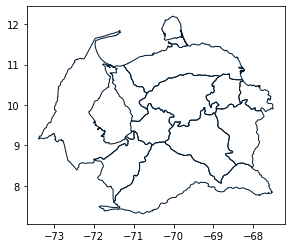

In [12]:
venezuela_estados = venezuela_poligonos[venezuela_poligonos.NAME_1.isin(['Barinas','Mérida','Falcón','Zulia','Trujillo','Carabobo','Yaracuy','Lara','Portuguesa','Cojedes'])]
venezuela_estados.boundary.plot(color='#001B32', linewidth=1)

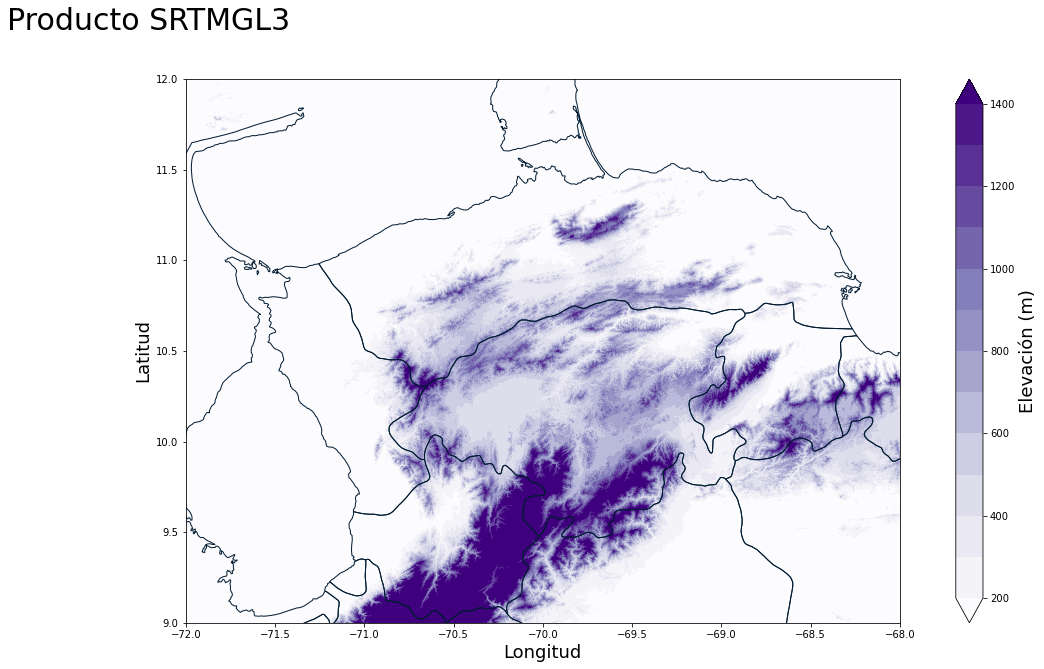

In [13]:
# plot
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 1, 1)

# Raster
levels=[200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400]
graf = rds_elevacion.elevacion.plot(cmap='Purples',levels=levels)
graf.colorbar.set_label('Elevación (m)',fontsize=18)
ax.add_collection(graf)

# poligonos
venezuela_estados.boundary.plot(color='#001B32', linewidth=1,ax=ax)

# titulos
plt.title(f"",fontsize=30,loc='center')
plt.suptitle("Producto SRTMGL3",ha='left',fontsize=30,x=0.125)
plt.xlabel("Longitud",loc='center',fontsize=18)
plt.ylabel("Latitud",loc='center',fontsize=18)

plt.savefig('./cerro_saroche/figuras/nasa_elevacion.png')

plt.show()